In [1]:
import numpy as np
import os 
import time
from scipy.signal import savgol_filter
import colour

# My custom library of photoelastic tools
import sys
sys.path.append('/eno/jdfeathe/pepe/')
#sys.path.append('/home/jack//workspaces/jupyter-workspace/pepe/')

from pepe.auto import Trial
from pepe.preprocess import checkImageType, circularMask
from pepe.simulate import genSyntheticResponse
from pepe.visualize import visCircles
from pepe.analysis import derivative

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 250
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = 'stix'
plt.rcParams["image.cmap"] = 'plasma'

In [3]:
# Load in a sample trial
syntheticFolder = '/eno/jdfeathe/DATA/SpaceJam_Synthetic/'
dataset = '2022-04-29_100_MHS_Gap2_0_Synthetic'

trial = Trial(syntheticFolder + dataset)
trial.fixAllNan()

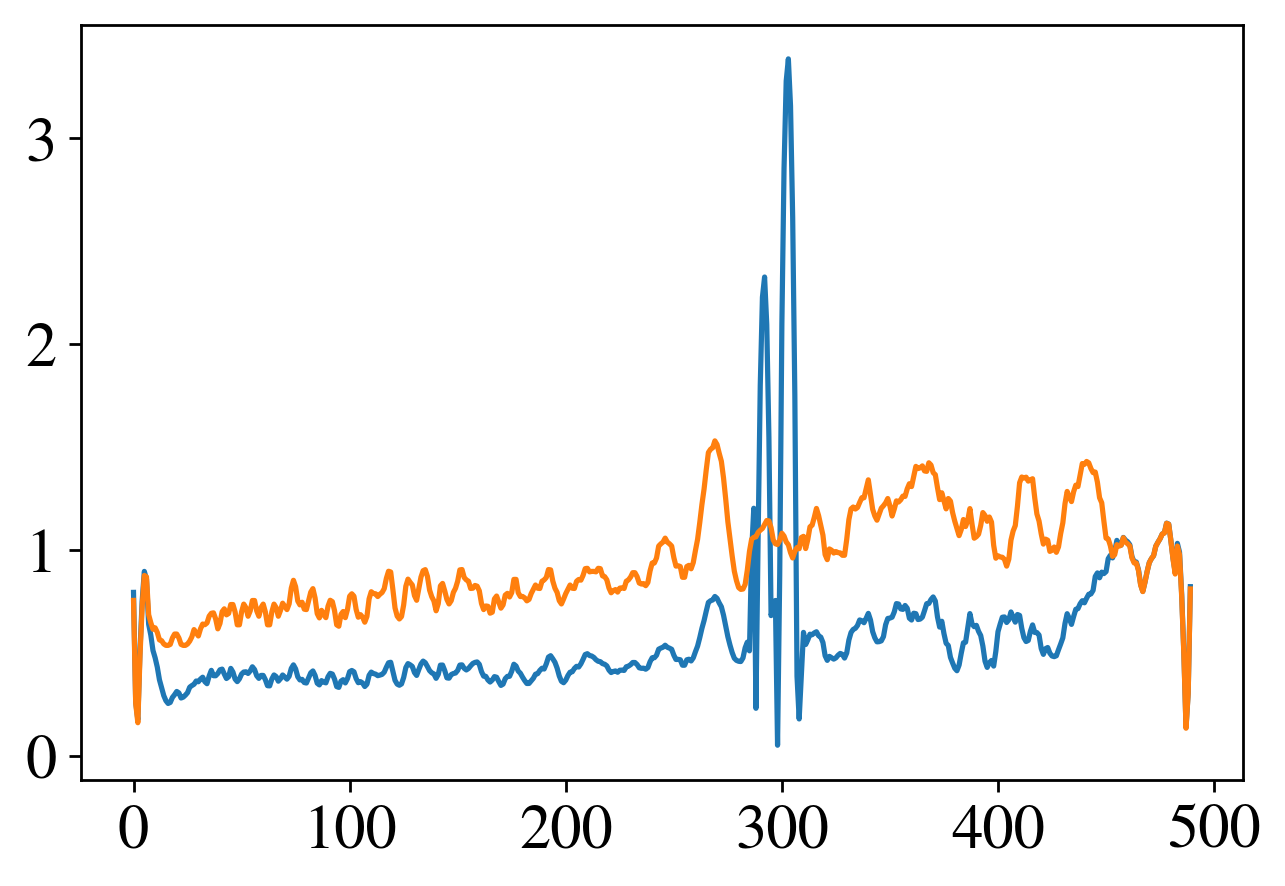

In [26]:
centralParticle = trial.particleNear([500, 500])

bottomContact = np.argmin(np.abs(trial.averageForcePositions(centralParticle)))

contactYArr = trial.centerArr[centralParticle][:,0] + trial.radiusArr[centralParticle] * np.cos(trial.betaArr[centralParticle][bottomContact])
contactXArr = trial.centerArr[centralParticle][:,1] + trial.radiusArr[centralParticle] * np.sin(trial.betaArr[centralParticle][bottomContact])

contactYVelocityArr = savgol_filter(derivative(savgol_filter(contactYArr, 11, 1), 1/70), 11, 2)
contactXVelocityArr = savgol_filter(derivative(savgol_filter(contactXArr, 11, 1), 1/70), 11, 2)

contactVelocityArr = np.sqrt(contactXVelocityArr**2 + contactYVelocityArr**2)
contactVelocityArr = contactVelocityArr / trial.settings["pxPerMeter"] * 1e3

velocityArr = np.abs(savgol_filter(derivative(savgol_filter(trial.centerArr[centralParticle,:,1], 11, 1), 1/70), 11, 2))
velocityArr = velocityArr / trial.settings["pxPerMeter"] * 1e3

omegaArr = savgol_filter(derivative(savgol_filter(trial.angleArr[centralParticle], 7, 1), 1/70), 11, 2)

#plt.plot(omegaArr * trial.radiusArr[centralParticle] / trial.settings["pxPerMeter"] * 1e3 / contactVelocityArr, 'o')
#plt.ylim([-1.5, 1.5])
plt.plot(contactVelocityArr)
plt.plot(velocityArr)
plt.show()